In [27]:
from cdl_helper import read_in_all_matches
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = read_in_all_matches()
df = df[~df['matchGame.matchId'].isin(df[df['totalDamageDealt'] == 0]['matchGame.matchId'])]
df = df[~df['matchGame.matchId'].isin(df[df['totalDamageDealt'] == np.nan]['matchGame.matchId'])]
df = df[df['gameMode']=='CDL Hardpoint']
df['totalEngagements'] = df['totalDeaths'] + df['totalKills']
df['place']=1
df.sample(5)

,gameMap,gameMode,id,programId,firstName,lastName,alias,headshot,socialNetworkHandles,averageSpeed,...,homeTeamGamesWon,awayTeamGamesWon,winnerTeamId,loserTeamId,event,setting,totalHeadshots,totalTiersCaptured,totalEngagements,place
2,Embassy,CDL Hardpoint,264,2,Jamie,Craven,Insight,https://www.callofduty.com/content/dam/activis...,[],162.308578,...,1,3,12,17,M1Qual,online,NaN,NaN,31.0,1
1,Embassy,CDL Hardpoint,35,2,McArthur,Jovel,Cellium,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",170.548676,...,0,3,7,15,M1Qual,online,NaN,NaN,38.0,1
29,Embassy,CDL Hardpoint,217,2,Kaden,Stockdale,Exceed,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",173.511322,...,1,3,11,15,M3Qual,online,NaN,NaN,60.0,1
1,Breenbergh Hotel,CDL Hardpoint,38,2,Kenneth,Williams,Kenny,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",215.862411,...,1,3,69,6,M1Qual,online,NaN,NaN,41.0,1
29,Embassy,CDL Hardpoint,100,2,Dillon,Price,Attach,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",169.208710,...,2,3,12,13,M2Event,lan,NaN,NaN,54.0,1


In [28]:
matches = df[['matchGame.matchId', 'abbrev', 'totalKills', 'totalDeaths', 'totalDistanceTraveled', 'untradedKills', 'totalDamageDealt', 'totalEngagements',
              'totalRotationKills', 'team_type', 'gameMap', 'place', 'tradedDeaths']].groupby(['matchGame.matchId', 'abbrev', 'team_type', 'gameMap']).sum().reset_index()
matches.sample(5)

,matchGame.matchId,abbrev,team_type,gameMap,totalKills,totalDeaths,totalDistanceTraveled,untradedKills,totalDamageDealt,totalEngagements,totalRotationKills,place,tradedDeaths
201,8727,ATL,host,Zarqwa Hydroelectric,92.0,96.0,245472.601562,60.0,11359.0,188.0,20.0,4,29.0
114,8700,ATL,guest,Embassy,112.0,111.0,281820.937500,79.0,13578.0,223.0,32.0,4,33.0
210,8731,NY,guest,Breenbergh Hotel,91.0,87.0,269392.195312,65.0,11038.0,178.0,19.0,4,27.0
61,8659,TOR,host,Embassy,84.0,74.0,202108.414062,66.0,10096.0,158.0,17.0,4,27.0
146,8709,ATL,guest,Embassy,83.0,73.0,207474.046875,61.0,9977.0,156.0,18.0,4,26.0


In [29]:
merged_df = pd.merge(df, matches, how='left', on=['matchGame.matchId', 'abbrev', 'gameMap'], suffixes=('', 'Team'))
merged_df = merged_df[merged_df['placeTeam']==4]
merged_df.sample(2)

,gameMap,gameMode,id,programId,firstName,lastName,alias,headshot,socialNetworkHandles,averageSpeed,...,team_typeTeam,totalKillsTeam,totalDeathsTeam,totalDistanceTraveledTeam,untradedKillsTeam,totalDamageDealtTeam,totalEngagementsTeam,totalRotationKillsTeam,placeTeam,tradedDeathsTeam
753,Breenbergh Hotel,CDL Hardpoint,39,2,Preston,Greiner,Priestahh,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",189.73671,...,guest,93.0,74.0,246710.906250,77.0,10451.0,167.0,17.0,4,30.0
24,Breenbergh Hotel,CDL Hardpoint,38,2,Kenneth,Williams,Kenny,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",190.52713,...,host,81.0,79.0,249434.121094,61.0,9623.0,160.0,12.0,4,23.0


In [30]:
merged_df['hillTimeTeam'] = [gs if tt == 'guest' else hs for gs, tt, hs in zip(merged_df['matchGameResult.guestGameScore'],
                                                                               merged_df['team_type'],
                                                                               merged_df['matchGameResult.hostGameScore'])]

In [31]:
merged_df['percEngagements'] = merged_df['totalEngagements']/merged_df['totalEngagementsTeam']
merged_df['percHillTime'] = merged_df['hillTime']/merged_df['hillTimeTeam']
merged_df['percRotationalKills'] = merged_df['totalRotationKills']/merged_df['totalRotationKillsTeam']
merged_df['percUntradedKills'] = merged_df['untradedKills']/merged_df['untradedKillsTeam']
merged_df['percDamageDealt'] = merged_df['totalDamageDealt']/merged_df['totalDamageDealtTeam']
merged_df['percTotalKills'] = merged_df['totalKills']/merged_df['totalKillsTeam']
merged_df['percTradedDeaths'] = merged_df['tradedDeaths']/merged_df['tradedDeathsTeam']
merged_df['impactRating'] = ((merged_df['percDamageDealt']+merged_df['percHillTime']+merged_df['percRotationalKills']+merged_df['percUntradedKills']+merged_df['percTotalKills']+merged_df['percTradedDeaths'])/5)/0.25
merged_df['percDistanceTraveled'] = merged_df['totalDistanceTraveled']/merged_df['totalDistanceTraveledTeam']

<AxesSubplot:xlabel='percHillTime', ylabel='percEngagements'>

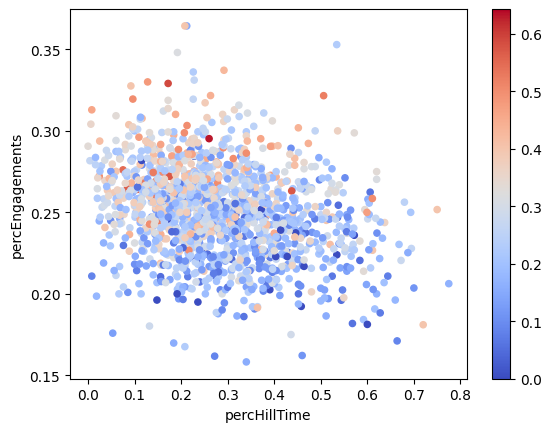

In [32]:
merged_df = merged_df[merged_df['percEngagements'] > 0]
merged_df[['percHillTime', 'percEngagements']].plot(kind='scatter', x='percHillTime', y='percEngagements', c=merged_df['percRotationalKills'], cmap='coolwarm')

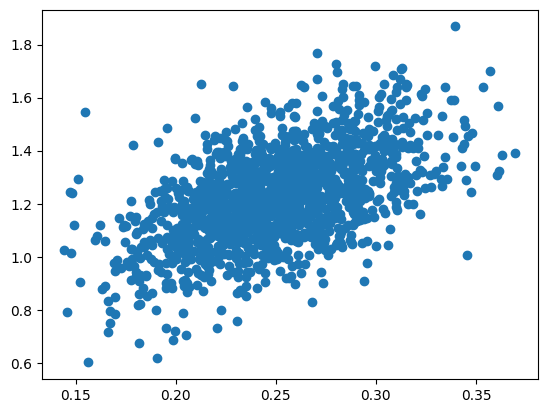

In [33]:
merged_df = merged_df[merged_df['matchGame.matchId'] !=8691]
plt.scatter(merged_df['percDamageDealt'], merged_df['impactRating'])

In [34]:
merged_df.sort_values('impactRating', ascending=False, inplace=True)
merged_df['matchGame.matchId'][:10]

1215     8740
1117     8733
230      8650
387     10118
288      8654
996      8749
1471    10890
1045     8727
402     10115
235      8650
Name: matchGame.matchId, dtype: int64

In [35]:
merged_df.iloc[:10][['alias', 'matchGame.matchId', 'oppo_abbrev', 'gameMap']]

,alias,matchGame.matchId,oppo_abbrev,gameMap
1215,JoeDeceives,8740,FLA,Zarqwa Hydroelectric
1117,Nero,8733,FLA,Breenbergh Hotel
230,Drazah,8650,FLA,Breenbergh Hotel
387,Mack,10118,BOS,Embassy
288,Huke,8654,BOS,Breenbergh Hotel
996,Exceed,8749,TX,Breenbergh Hotel
1471,Scrap,10890,ATL,Breenbergh Hotel
1045,Envoy,8727,ATL,Mercado Las Almas
402,Octane,10115,FLA,Breenbergh Hotel
235,Brack,8650,LAT,Embassy


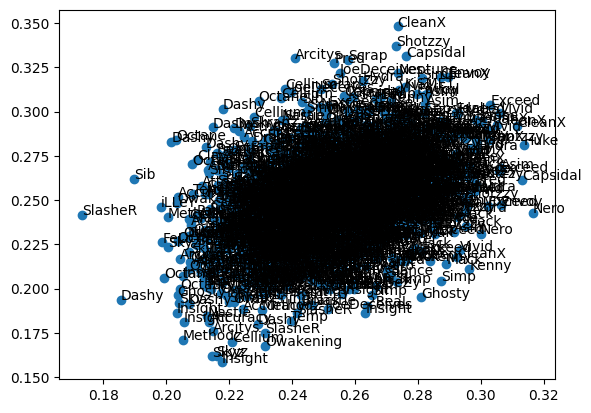

In [36]:
plt.scatter(merged_df['percDistanceTraveled'], merged_df['percEngagements'])
for x, y, name in zip(merged_df['percDistanceTraveled'], merged_df['percEngagements'], merged_df['alias']):
    plt.text(x, y, name)

In [37]:
mean_df = merged_df.groupby('alias').mean().reset_index()
mean_df.sample(2)

,alias,id,programId,averageSpeed,highestStreak,untradedKills,untradedDeaths,tradedKills,tradedDeaths,inapplicableTradedKills,...,hillTimeTeam,percEngagements,percHillTime,percRotationalKills,percUntradedKills,percDamageDealt,percTotalKills,percTradedDeaths,impactRating,percDistanceTraveled
40,Prolute,522.0,2.0,182.670344,4.111111,14.722222,16.555556,5.833333,6.666667,0.0,...,231.111111,0.244061,0.380660,0.225736,0.228468,0.240036,0.233756,0.277248,1.268722,0.249289
30,Mack,225.0,2.0,184.797005,3.793103,13.793103,15.793103,7.275862,6.551724,0.0,...,226.000000,0.247274,0.294735,0.239896,0.215442,0.230206,0.233971,0.270953,1.188162,0.269387


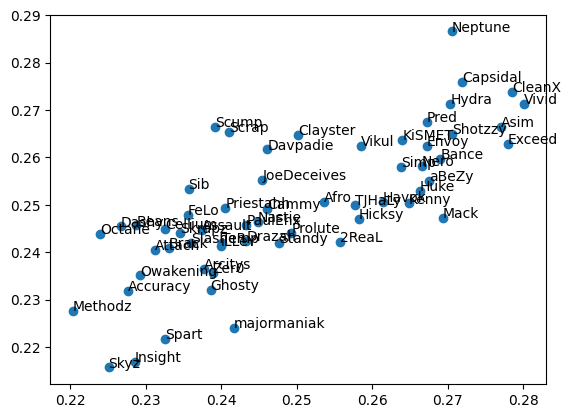

In [38]:
plt.scatter(mean_df['percDistanceTraveled'], mean_df['percEngagements'])
for x, y, name in zip(mean_df['percDistanceTraveled'], mean_df['percEngagements'], mean_df['alias']):
    plt.text(x, y, name)

In [39]:
from cdl_helper import CDL_ROLES
import seaborn as sns

mean_df['role'] = mean_df['alias'].map(CDL_ROLES)
merged_df['role'] = merged_df['alias'].map(CDL_ROLES)

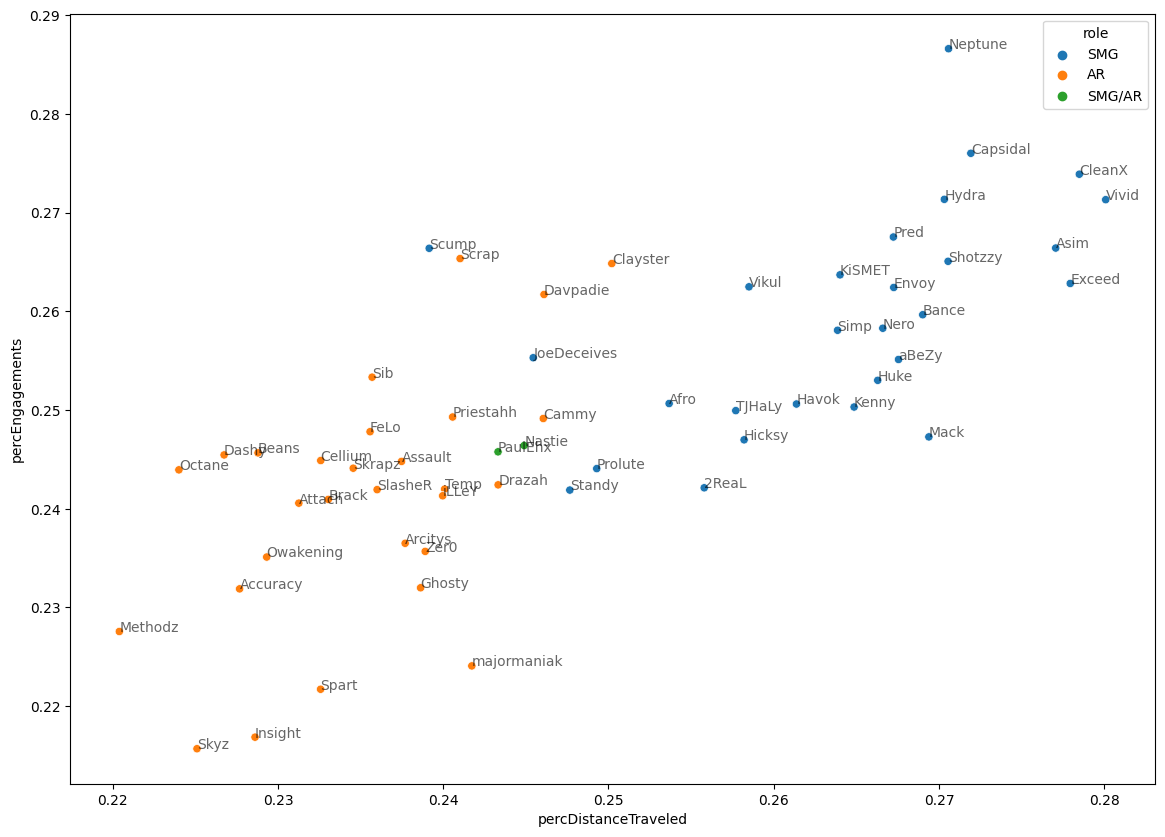

In [40]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=mean_df, x='percDistanceTraveled', y='percEngagements', hue='role')
for x, y, name in zip(mean_df['percDistanceTraveled'], mean_df['percEngagements'], mean_df['alias']):
    plt.text(x, y, name, alpha=0.6)

<AxesSubplot:xlabel='percDistanceTraveled', ylabel='percEngagements'>

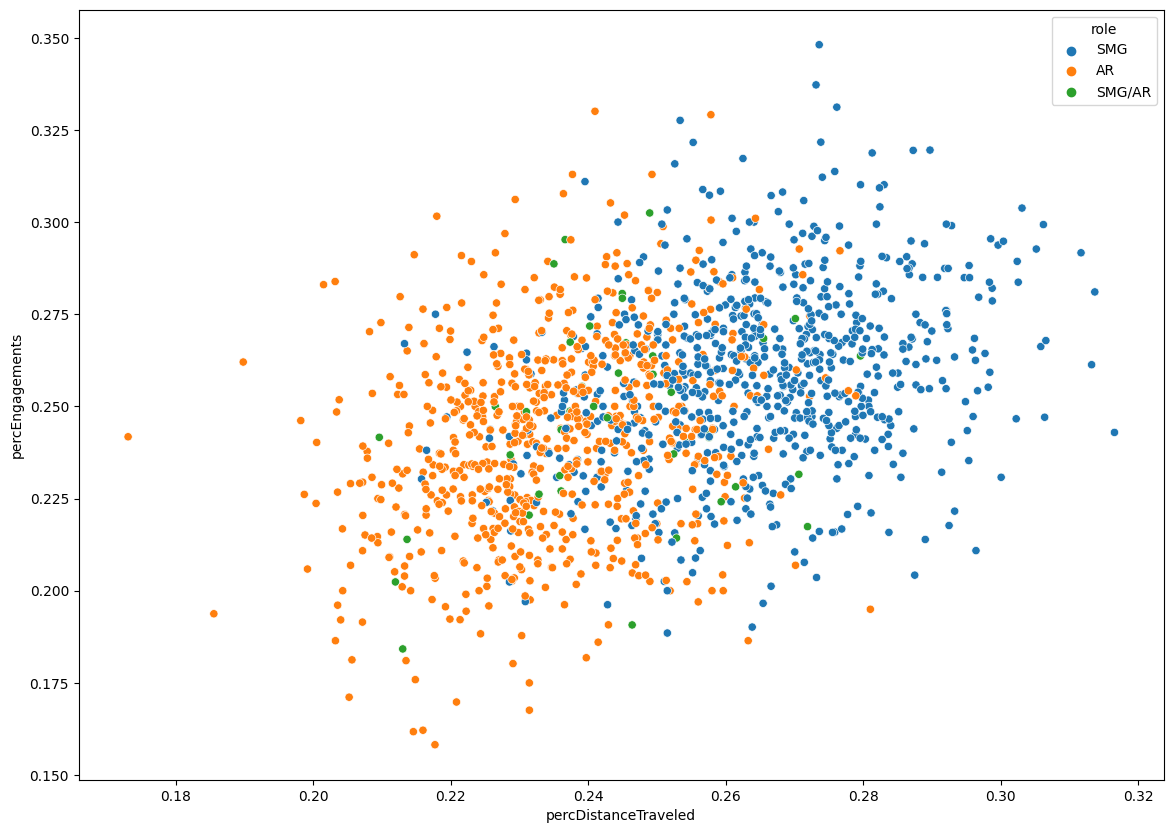

In [41]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=merged_df, x='percDistanceTraveled', y='percEngagements', hue='role')

<AxesSubplot:xlabel='speedScore', ylabel='impactRating'>

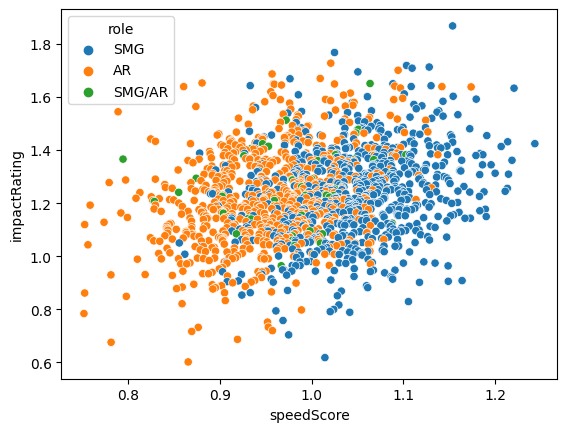

In [42]:
merged_df['speedScore'] = ((merged_df['percDistanceTraveled']+merged_df['percEngagements'])/2)/0.25
sns.scatterplot(data=merged_df, x='speedScore', y='impactRating', hue='role')

Text(0.975, 1.07, 'Boxes Indicate the Mean Scores\nfor Each Role (excl. SMG/AR)')

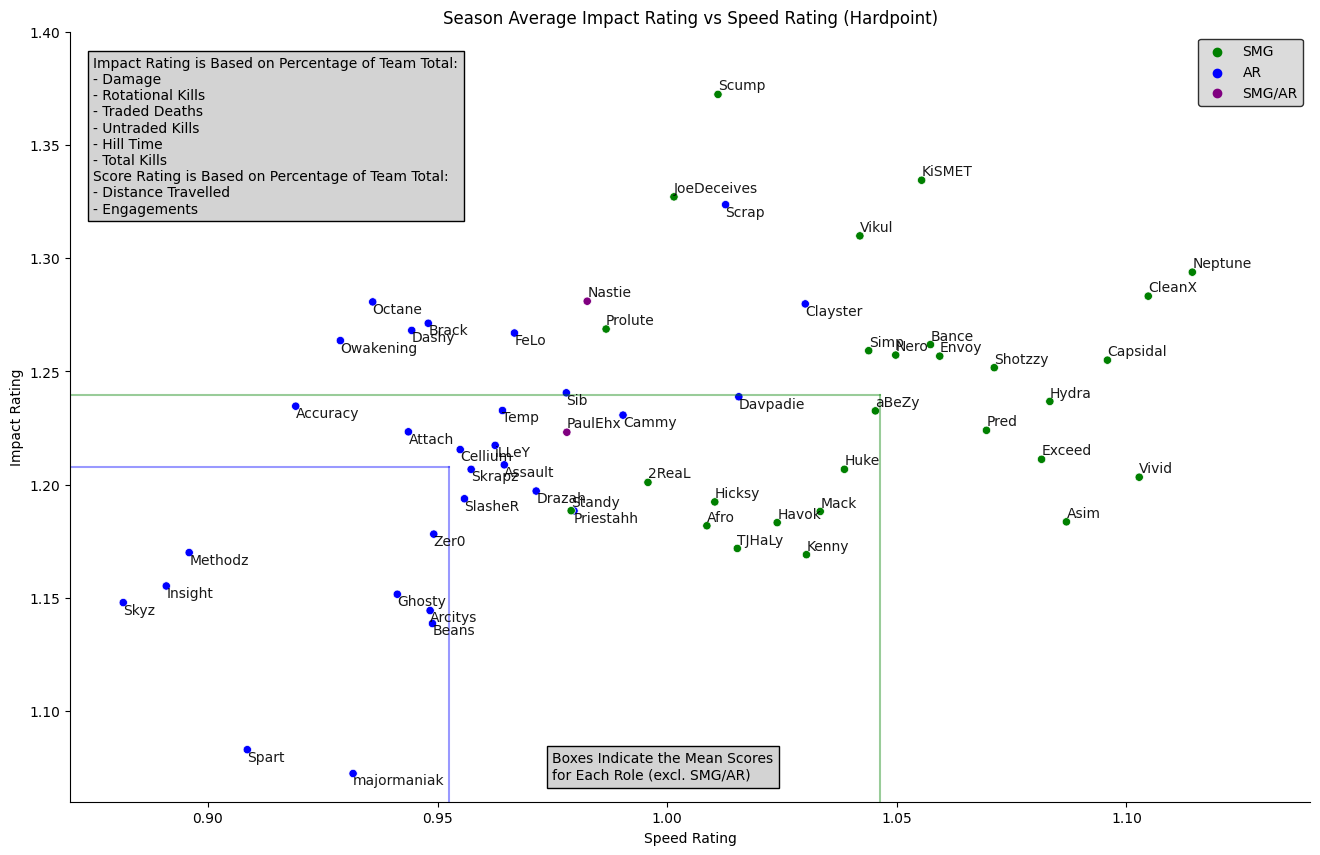

In [120]:
fig = plt.figure(figsize=(16, 10))
ax = fig.subplots()
mean_df = merged_df.groupby(['alias', 'role']).mean().reset_index()
mean_df.sample(2)
sns.scatterplot(data=mean_df, x='speedScore', y='impactRating', hue='role', ax=ax, palette=['green', 'blue', 'purple'])
for x, y, name, role in zip(mean_df['speedScore'], mean_df['impactRating'], mean_df['alias'], mean_df['role']):
    plt.text(x, y-0.005 if role=='AR' else y+0.002, name, alpha=0.9)

ar_speed_mean = mean_df[mean_df['role']=='AR']['speedScore'].mean()
smg_speed_mean = mean_df[mean_df['role']=='SMG']['speedScore'].mean()
ar_imp_mean = mean_df[mean_df['role']=='AR']['impactRating'].mean()
smg_imp_mean = mean_df[mean_df['role']=='SMG']['impactRating'].mean()

def draw_mean(ax, ymean, xmean, colour):
    ax.plot([xmean, xmean], [ax.get_ylim()[0] ,ymean], color=colour, alpha=0.4)
    ax.plot([ax.get_xlim()[0], xmean], [ ymean,ymean], color=colour, alpha=0.4)

draw_mean(ax, ar_imp_mean, ar_speed_mean, 'blue')
draw_mean(ax, smg_imp_mean, smg_speed_mean, 'green')

ax.set_xlim([0.87, 1.14])
ax.set_ylim([1.06, 1.4])
ax.spines[['top', 'right']].set_visible(False)
ax.set_title("Season Average Impact Rating vs Speed Rating (Hardpoint)")
ax.set_ylabel("Impact Rating")
ax.set_xlabel("Speed Rating")
frame = ax.legend().get_frame()
frame.set_color('lightgrey')
frame.set_edgecolor('black')
ax.text(0.875, 1.32, "Impact Rating is Based on Percentage of Team Total:\n- Damage\n- Rotational Kills\n- Traded Deaths\n- Untraded Kills\n- Hill Time\n- Total Kills\nScore Rating is Based on Percentage of Team Total:\n- Distance Travelled\n- Engagements",
        bbox={'facecolor':'lightgrey'})
ax.text(0.975, 1.07, "Boxes Indicate the Mean Scores\nfor Each Role (excl. SMG/AR)", bbox={'facecolor':'lightgrey'})

<AxesSubplot:xlabel='speedScore', ylabel='impactRating'>